In [2]:
# Gradient Descent for Linear Regression
# yhat = wx + b 
# loss = (y-yhat)**2 / N 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Initialise some parameters
x = np.random.randn(10,1)
y = 2*x + np.random.rand()
# Parameters
w = 0.0 
b = 0.0 
# Hyperparameter 
learning_rate = 0.0005

In [3]:
# Create gradient descent function
def GD(x, y, w, b, learning_rate): 
    dldw = 0.0 
    dldb = 0.0 
    N = x.shape[0]
    # loss = (y-(wx+b)))**2
    for xi, yi in zip(x,y): 
       dldw += -2*xi*(yi-(w*xi+b))
       dldb += -2*(yi-(w*xi+b))
    
    # Make an update to the w parameter 
    w = w - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return w, b 

In [4]:
# Iteratively make updates
print("\t epochs \t\t loss \t\t weights \t\t bias")
for epoch in range(800): 
    w,b = GD(x,y,w,b,learning_rate)
    yhat = w*x + b
    loss = np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0]) 
#     print(f'\t{epoch} \t\t {loss} \t\t {w} \t\t {b}')
# print(x,y)

	 epochs 		 loss 		 weights 		 bias


	 epochs 		 loss 		 weights 		 bias
	0 		 [0.19229937] 		 [1.47823963] 		 [0.60569835]
	1 		 [0.19178265] 		 [1.47895781] 		 [0.60566108]
	2 		 [0.19126775] 		 [1.4796747] 		 [0.60562321]
	3 		 [0.19075465] 		 [1.48039029] 		 [0.60558474]
	4 		 [0.19024335] 		 [1.48110459] 		 [0.60554567]
	5 		 [0.18973384] 		 [1.4818176] 		 [0.60550601]
	6 		 [0.18922611] 		 [1.48252932] 		 [0.60546575]
	7 		 [0.18872016] 		 [1.48323976] 		 [0.60542489]
	8 		 [0.18821597] 		 [1.48394892] 		 [0.60538345]
	9 		 [0.18771355] 		 [1.4846568] 		 [0.60534142]


C:\Users\Ali Zain\AppData\Local\Temp\ipykernel_7292\1115789556.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


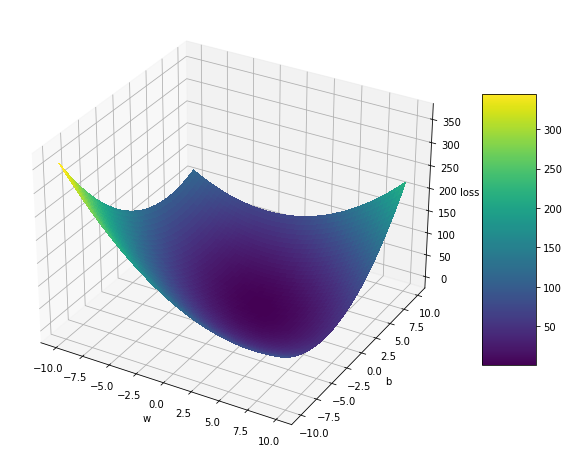

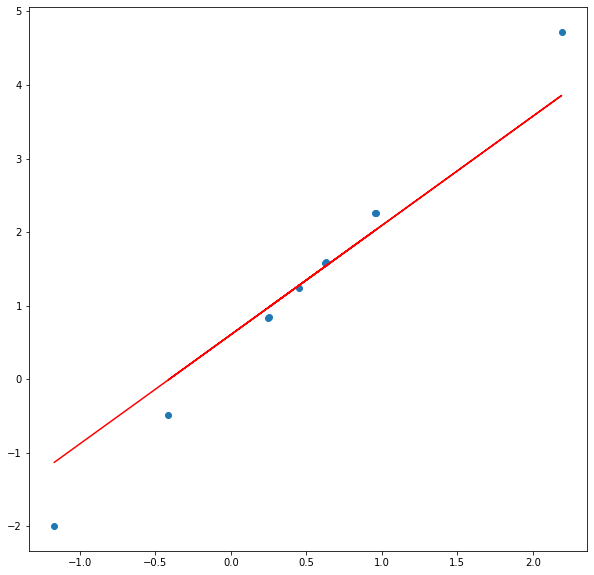

In [6]:
class GD:
    def __init__(self, x, y, w, b, learning_rate):
        self.x = x
        self.y = y
        self.w = w
        self.b = b
        self.learning_rate = learning_rate
    
    def GD(self):
        dldw = 0.0 
        dldb = 0.0 
        N = self.x.shape[0]
        # loss = (y-(wx+b)))**2
        for xi, yi in zip(self.x,self.y): 
           dldw += -2*xi*(yi-(self.w*xi+self.b))
           dldb += -2*(yi-(self.w*xi+self.b))

        # Make an update to the w parameter 
        self.w = self.w - self.learning_rate*(1/N)*dldw
        self.b = self.b - self.learning_rate*(1/N)*dldb
        return self.w, self.b
    
    def loss(self):
        yhat = self.w*self.x + self.b
        loss = np.divide(np.sum((self.y-yhat)**2, axis=0), self.x.shape[0]) 
        return loss
    
    def plot(self):
        w = np.arange(-10, 10, 0.1)
        b = np.arange(-10, 10, 0.1)
        w, b = np.meshgrid(w, b)
        loss = np.zeros(w.shape)
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                yhat = w[i,j]*self.x + b[i,j]
                loss[i,j] = np.divide(np.sum((self.y-yhat)**2, axis=0), self.x.shape[0])
        # CHange size
        plt.rcParams['figure.figsize'] = [10, 10]
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(w, b, loss, cmap=cm.viridis, linewidth=0, antialiased=False)
        ax.set_xlabel('w')
        ax.set_ylabel('b')
        ax.set_zlabel('loss')
        ax.scatter(self.w, self.b, self.loss(), color='magenta')
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
    
    def plot_scatter(self):
        plt.scatter(self.x, self.y)
        plt.plot(self.x, self.w*self.x + self.b, color='red')
        plt.show()
    


# Create an instance of the class
gd = GD(x, y, w, b, learning_rate)

# Iterate over the data
print("\t epochs \t\t loss \t\t weights \t\t bias")
for epoch in range(10):
    gd.GD()
    print(f'\t{epoch} \t\t {gd.loss()} \t\t {gd.w} \t\t {gd.b}')

# Plot the loss function
gd.plot()

# Plot the scatter plot
gd.plot_scatter()



In [87]:
class GD:
    def __init__(self, x, y, w, b, learning_rate, epochs):
        self.x = x
        self.y = y
        self.w = w
        self.b = b
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self):
        # calcualte the b using GD
        print("\t epochs \t\t loss \t\t weights \t\t bias")

        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.w*self.x.ravel() - self.b)
            loss_slope_w = -2 * np.sum((y - self.w*self.x.ravel() - self.b)*self.x.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.w = self.w - (self.lr * loss_slope_w)
            print(f'\t{i} \t\t {self.loss()} \t\t {self.w} \t\t {self.b}')
        
    def predict(self,X):
        return self.m * X + self.b
        
    def loss(self):
        yhat = self.w*self.x + self.b
        loss = np.divide(np.sum((self.y-yhat)**2, axis=0), self.x.shape[0]) 
        return loss
    
    def plot(self):
        w = np.arange(-10, 10, 0.1)
        b = np.arange(-10, 10, 0.1)
        w, b = np.meshgrid(w, b)
        loss = np.zeros(w.shape)
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                yhat = w[i,j]*self.x + b[i,j]
                loss[i,j] = np.divide(np.sum((self.y-yhat)**2, axis=0), self.x.shape[0])
        # CHange size
        plt.rcParams['figure.figsize'] = [10, 10]
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(w, b, loss, cmap=cm.viridis, linewidth=0, antialiased=False)
        ax.set_xlabel('w')
        ax.set_ylabel('b')
        ax.set_zlabel('loss')
        ax.scatter(self.w, self.b, self.loss(), color='red')
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
    
    def plot_scatter(self):
        plt.scatter(self.x, self.y)
        plt.plot(self.x, self.w*self.x + self.b, color='red')
        plt.show()


In [136]:
x = np.random.randn(10,1)
y = 2*x + np.random.rand(10,1)
w = 0
b = 0
epochs = 500
learning_rate = 0.01

	 epochs 		 loss 		 weights 		 bias
	0 		 [2.46796018] 		 -0.03576193578420617 		 0.9221146526207419
	1 		 [2.31990923] 		 0.03686143012520392 		 -0.002773876431524047
	2 		 [2.47609955] 		 -0.03711038975415057 		 0.9277476878202237
	3 		 [2.32432413] 		 0.03733981477390051 		 -0.008511504534163938
	4 		 [2.48252814] 		 -0.03757013703069717 		 0.9335224218533208
	5 		 [2.32890758] 		 0.0378018671712116 		 -0.014321898888966289
	6 		 [2.48910371] 		 -0.03803502629326547 		 0.9393686553266419
	7 		 [2.3336172] 		 0.03826962351581088 		 -0.020204191522409154
	8 		 [2.49583094] 		 -0.03850566771644362 		 0.9452872295055751
	9 		 [2.33845625] 		 0.03874316782020144 		 -0.02615927102810478
	10 		 [2.50271345] 		 -0.038982132806991504 		 0.951279039500167
	11 		 [2.34342811] 		 0.03922257171210368 		 -0.032188038062525015
	12 		 [2.50975496] 		 -0.03946449362655714 		 0.9573449915226973
	13 		 [2.34853624] 		 0.03970790769744342 		 -0.038291404427414855
	14 		 [2.51695926] 		 -0.0399528231282

C:\Users\Ali Zain\AppData\Local\Temp\ipykernel_7292\3779420069.py:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


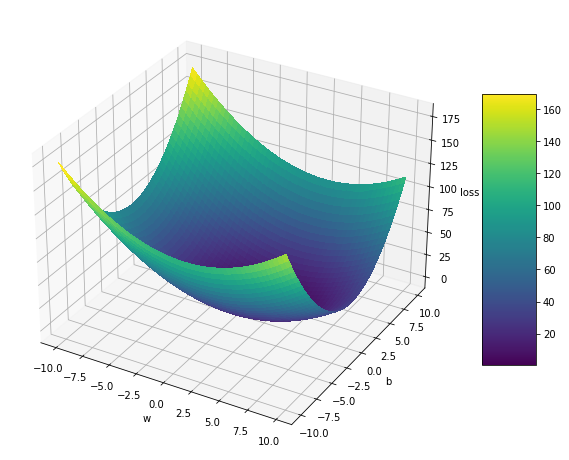

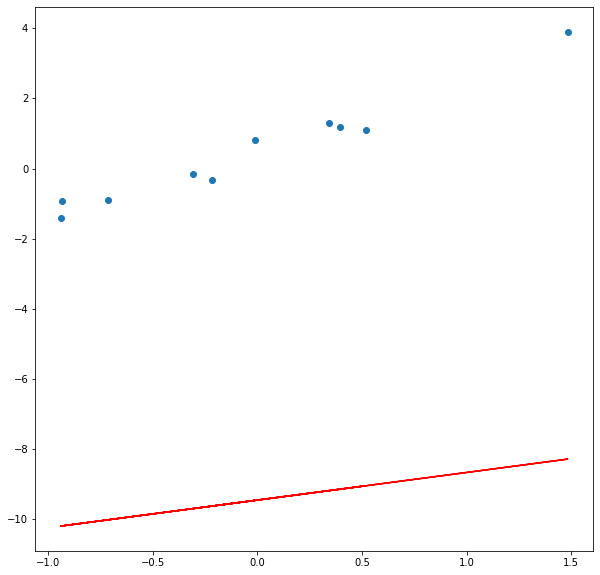

In [137]:
gd1 = GD(x, y, w, b, learning_rate, epochs)

# Iterate over the data
gd1.fit()

# Plot the loss function
gd1.plot()

# Plot the scatter plot
gd1.plot_scatter()

In [127]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

gd = GDRegressor(0.001,50)
gd.fit(x,y)

-0.006855210410827744 -0.1364781291429913
